# Nonparametric methods

Nonparametric methods are not based on the assumption that the values (unpaired t tests and ANOVA) or the set of differences (between paired/matched values like in paired t tests and repeated measures ANOVA) are sampled from a Gaussian distribution, i.e. that can be defined by parameters. These methods work by ignoring the actual data values and instead analyzing only their **ranks**, from low to high values. This approach ensures that the test isn't affected much by outliers.

Computer-intensive resampling and bootstrapping methods also do not assume a specified distribution so they are also nonparametric.

Note - _Biological data never follow a Gaussian distribution precisely, because a Gaussian distribution extends infinitely in both directions and so includes both infinitely low negative numbers and infinitely high positive numbers. But, many kinds of biological data follow a bell-shaped distribution that is approximately Gaussian. Because ANOVA, t tests, and other statistical tests work well even if the distribution is only approximately Gaussian, especially with large samples, these tests are used routinely in many fields of science._

Besides the advantages of nonparametric tests that don't require the assumption of sampling from a Gaussian population, these tests are less powerful when the data are Gaussian, the results are usually not reported with CIs and they are not readily extended to regression models. In general, the problem comes with small samples.

| Distribution | Test          | Small samples               | Large samples                               |
| ------------ | ------------- | --------------------------- | ------------------------------------------- |
| Gaussian     | Nonparametric | Misleading, little power    | Nearly as powerful as parametric tests      |
| Non-Gaussian | Parametric    | Misleading, not very robust | Robust to violations of Gaussian assumption |
| Not sure     | Normality     | Not very helpful            | Helpful                                     |

Indeed, the central limit theorem ensures that parametric tests work well with large samples even if the data are sampled from non-Gaussian populations, i.e. they are robust to mild deviations from Gaussian distributions so long as the samples are large.

![selection of the nonparamettric method](https://pingouin-stats.org/_images/flowchart_nonparametric.svg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Comparing two unpaired groups

If we have two groups with observations $x_1, x_2, …, x_m$ and $y_1, y_2, …, y_n$ sampled from X and Y populations, then **Mann-Whitney U/Wilcoxon rank-sum test** compares each observation $x_i$ from sample x with each observation $y_j$ from sample y. The null hypothesis $p(x_i > y_j)=0.5$; the alternative hypothesis is therefore $p(x_i > y_j) \neq 0.5$.

Above two-sided alternative hypothesis tests that there is equal probability of $x_i$ is greater or lesser than $y_j$ (both groups came from same population), one-sided alternative hypothesis tests probability of $x_i$ is greater than $y_j$ and vice versa.

We can also state the two-sided hypothesis in terms of median as, Null hypothesis: Two groups have equal median; Alternative hypothesis: Two groups does not have equal median.

One-sided alternative hypothesis tests median from one group can be greater or lesser than other group.

The data analyzed below come from the chapter on t tests. Two values tie for ranks 4 and 5, so both are assigned a rank of 4.5

In [2]:
old_rank  = np.array([3, 1, 11, 6, 4.5, 8, 4.5, 12, 2])
young_rank= np.array([10, 13, 14, 16, 15, 17, 9, 7])

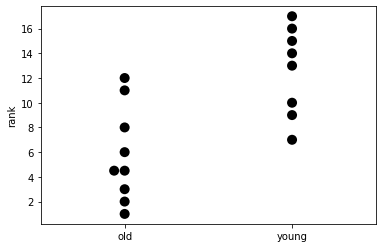

In [3]:
sns.swarmplot(data=[old_rank, young_rank], size=10, color='black')
plt.xticks([0,1], ['old', 'young'])
plt.ylabel('rank');

### Method

1. Rank the values.
2. Sum the ranks in each group.
3. Calculate the mean rank of each group. If the means of the ranks in the two groups are very different, the P value will be small.
4. Compute a P value for the null hypothesis that the distribution of ranks is totally random.

If there are ties, different programs might calculate a different P value.

The null hypothesis is that the distributions of both groups are identical, so that there is a 50% probability that an observation from a value randomly selected from one population exceeds an observation randomly selected from the other population. Based on the null hypothesis, the P value answers the question
>if the distribution of ranks between two groups were distributed randomly, what is the probability that the difference between the mean ranks would be this large or even larger?²

Say differently, The Mann-Whitney U test (also called Wilcoxon rank-sum test) is a non-parametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. The test assumes that the two samples are independent. The rank biserial correlation is the difference between the proportion of favorable evidence minus the proportion of unfavorable evidence. The common language effect size is the proportion of pairs where x is higher than y.

In [4]:
mean_rank_old  = np.mean(old_rank)
mean_rank_young= np.mean(young_rank)

print(f"The mean of the ranks for `old`={mean_rank_old:.3f}, and for `young`={mean_rank_young:.3f}")

The mean of the ranks for `old`=5.778, and for `young`=12.625


In [5]:
old =  np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young= np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])

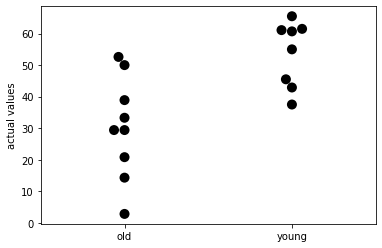

In [6]:
sns.swarmplot(data=[old, young], size=10, color='black')
plt.xticks([0,1], ['old', 'young'])
plt.ylabel('actual values');

Calculate the U statistics for each group as $U_x = mn+\frac{m(m+1)}{2}-R_x$ and $U_y = mn+\frac{n(n+1)}{2}-R_y$, where $m$ is the number of samples drawn from population X, $n$ the number of samples drawn from population Y, and $R_x$, $R_y$ is the sum of the ranks attributed to population X and Y.

The U statistics is the minimum of U statistics of both groups $U=min(U_x,U_y)$.

The p value is calculated based on the comparison between the [critical value](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/Mann-Whitney-Table-CriticalValues.pdf) and the U value. If $U \leq U_{critical}$, we reject the null hypothesis and vice versa.

In [7]:
stats.rankdata(np.concatenate([old, young]))

array([ 3. ,  1. , 11. ,  6. ,  4.5,  8. ,  4.5, 12. ,  2. , 10. , 13. ,
       14. , 16. , 15. , 17. ,  9. ,  7. ])

In [8]:
sum_rank_old  = np.sum(old_rank)
sum_rank_young= np.sum(young_rank)

len_old  = len(old)
len_young= len(young)

print(f"The mean of the ranks for `old`={sum_rank_old} of length {len_old}, \
and for `young`={sum_rank_young} or len {len_young}")

U_old  = len_old * len_young + len(old)*(  len(old)  +1)/2 - sum_rank_old
U_young= len_old * len_young + len(young)*(len(young)+1)/2 - sum_rank_young

print(f"U`old`={U_old}, and U`young`={U_young}, thus U={min(U_old,U_young)}")

print(f"Critical U=15 for alpha=0.05")

The mean of the ranks for `old`=52.0 of length 9, and for `young`=101 or len 8
U`old`=65.0, and U`young`=7.0, thus U=7.0
Critical U=15 for alpha=0.05


### Using scipy.stats

In [9]:
stats.mannwhitneyu(old, young, method='exact', alternative='two-sided') # with 'exact' no correction is made for ties

MannwhitneyuResult(statistic=7.0, pvalue=0.0037021801727684074)

It certainly is not impossible that random sampling of values from two identical populations would lead to sums of ranks this far apart, but it would be very unlikely. Accordingly, we conclude that the difference between the young and old group values is statistically significant.

NOTE - p value obtained from mannwhitneyu is based on the normal approximation and not exact. Set use_continuity=False for exact p value. Normal approximation is useful when sample size is large. Both exact and normal approximation p value should be roughly similar.

In [11]:
stats.mannwhitneyu(old, young, use_continuity=False)

MannwhitneyuResult(statistic=7.0, pvalue=0.0052344878643829085)

Note - The `ranksums` method should be used to compare two samples from continuous distributions. It does not handle ties between measurements in x and y. For tie-handling and an optional continuity correction see [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu).

In [12]:
stats.ranksums(old, young)

RanksumsResult(statistic=-2.790526301083191, pvalue=0.0052622424628052285)

### Using pingouin

In [13]:
import pingouin as pg

pg.mwu(old, young, method='exact', alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,7.0,two-sided,0.003702,0.805556,0.097222


### Off scale values

If some values are too high or too low to be quantified, parametric tests cannot be used, because those values are not known. Assign values too low to measure an arbitrary very low value and assign values too high to measure an arbitrary very high value. Because the nonparametric test only knows about the relative ranks of the values, it won't matter that you didn't enter those extreme values precisely.

## Comparing 2 paired groups

**Wilcoxon matched-pairs signed-rank test** ( tests the null hypothesis that there is no difference in the population and so the differences between matched pairs will be randomly positive or negative. The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero.

### Method

1. Calculate the difference between each matched pair, keeping track of the sign (decrease = negative);
2. Rank the _absolute_ value of the differences, temporarily ignoring the sign;
3. Add up the ranks of all positive differences and the ranks of all the negative differences;
4. Compute the difference between those two sums;
5. Compute a P value: if the the null hypothesis were true, what would be the chance of randomly choosing samples such that the sums of the absolute values of the positive and negative ranks would differ by X or more?

The Wilcoxon signed rank test uses the sum of the signed ranks as the test statistic $W$:

$$ W=\sum _{{i=1}}^{{N}}[\operatorname{sgn}(x_{{2,i}}-x_{{1,i}})\cdot R_{i}] $$

Here, the $i$-th of N measurement pairs is indicated by $x_i=(x_{1,i},x_{2,i})$ and $R_i$ denotes the rank of the pair. The rank simply represents the position of an observation in an ordered list of $|x_{2,i} - x_{1,i}|$. The inuition of the test statistic is that pairs with large absolute differences will have large ranks $R_i$. Thus, these pairs are the determining factors of $W$, while pairs exhibiting small absolute differences have a low $R_i$ and therefore little influence on the outcome of the test. Since the test statistic is based on ranks rather than the measurements themselves, the Wilcoxon signed rank test can be thought of as testing for shifts in median values between two groups.


In [14]:
# example data from the chapter on paired groups
cross_val = np.array(
    [23.5, 12, 21, 22, 19.125, 21.5, 22.125, 20.375, 18.250, 21.625, 23.250, 21, 22.125, 23, 12]
)
self_val =  np.array(
    [17.375, 20.375, 20, 20, 18.375, 18.625, 18.625, 15.25,16.5, 18, 16.25, 18, 12.75, 15.5, 18]
)

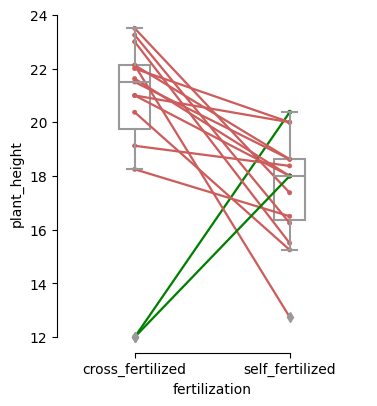

In [15]:
df = pd.DataFrame(data={
    'cross_fertilized': cross_val,
    'self_fertilized' : self_val
    }
)

ax = pg.plot_paired(
    # crazy data reshaping to fit the needs for a long-format dataFrame...
    data=df.reset_index().melt(
        value_vars=['cross_fertilized', 'self_fertilized'],
        id_vars='index',
        var_name='fertilization',
        value_name='plant_height'),
    dv='plant_height',
    within='fertilization',
    subject='index',
    boxplot=True,
    orient='v',
    boxplot_in_front=False,
    figsize=(4,4.5),
    boxplot_kwargs={'color': 'white'},
)

In [16]:
diff = cross_val - self_val
print("The array of differences between pairs is:", diff, sep='\n')

The array of differences between pairs is:
[ 6.125 -8.375  1.     2.     0.75   2.875  3.5    5.125  1.75   3.625
  7.     3.     9.375  7.5   -6.   ]


The first warning arises because the test ranks differences in the extra values of pairs. If two pairs share the same difference, ties arise during ranking. **Why are ties a problem?** The rank assigned to ties is based on the average of the ranks they span. Thus, if there are many ties, this reduces the expressiveness of the test statistic rendering the Wilcoxon test inappropriate. Since we only have a single tie here, this is not a problem.

The second warning relates to pairs where the difference is 0. **Why are zeros a problem?** Remember that the null hypothesis is that the differences of the pairs are centered around 0. However, observing differences where the value is exactly 0 do not give us any information for the rejection of the null. Therefore, _these pairs are discarded when computing the test statistic._ If this is the case for many of the pairs, the statistical power of the test would drop considerably. Again, this is not a problem for us as only a single zero value is present.

In [17]:
rank = stats.rankdata(np.absolute(diff))
print("The ranks of the obsolute value of the difference is:", rank, sep='\n')

The ranks of the obsolute value of the difference is:
[11. 14.  2.  4.  1.  5.  7.  9.  3.  8. 12.  6. 15. 13. 10.]


In [18]:
W_pos = np.sum(rank[diff > 0])
W_neg = np.sum(rank[diff < 0])
print(f"The sum of the ranks of all positive differences W+ = {W_pos} and the one for all the negative differences W- = {W_neg}")

The sum of the ranks of all positive differences W+ = 96.0 and the one for all the negative differences W- = 24.0


In [20]:
print(f"The difference between those two sum={W_pos - W_neg}, and the W statistics={min(W_pos,W_neg)}")

The difference between those two sum=72.0, and the W statistics=24.0


Use [tables of critical values for the Wilcoxon signed rank sum test](https://www.real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/) to find the probability of observing a value of W or more extreme. Most tables give both one-sided and two-sided p-values. If not, double the one-sided p-value to obtain the two-sided p-value. This is an exact test. The critical value is the value that a test statistic must exceed in order for the null hypothesis to be rejected. Thus, with a W statistics slightly lower than the critcal value, the P value should be around the alpha set for the analysis, i.e. $P \approx 0.05$.

The P value is approximated for small samples using tables. When both sample sizes are 10 or greater, we can treat the distribution of $W$ as if it were $\mathrm{Normal}(\mu_A, \sigma_A)$.

In [21]:
print(f"Critical W=25 for alpha=0.05 and n={len(diff)}")

Critical W=25 for alpha=0.05 and n=15


### Using scipy.stats and pingouin

To derive the p-value with `wilcoxon`, the exact distribution (mode == 'exact') can be used for sample sizes of up to 25. The default mode == 'auto' uses the exact distribution if there are at most 25 observations and no ties, otherwise a normal approximation is used (mode == 'approx').

In [22]:
stats.wilcoxon(x=cross_val, y=self_val, mode='exact')

WilcoxonResult(statistic=24.0, pvalue=0.041259765625)

In [23]:
stats.wilcoxon(diff) # we can also plug in the method the array of the differences

WilcoxonResult(statistic=24.0, pvalue=0.041259765625)

In [24]:
pg.wilcoxon(cross_val, self_val, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,24.0,two-sided,0.04126,0.6,0.824444


## Spearman's rank correlation

It separately ranks the X and Y values and then computes the correlation between the two sets of ranks. Pearson correlation quantifies the _linear_ relationship between X and Y, while Spearman quantifies the _monotonic_ relationship between X and Y.

_The nonparametric correlation methods have been discussed in details in the chapter about linear regression._

## Nonparametric ANOVA

See **Kruskal-Wallis test** (one-way ANOVA) and **Friedman's test** (repeated-measures one-way ANOVA). These tests first rank the data from low to high and then analyze the distribution of the ranks among groups.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. The test works on 2 or more independent samples, which may have different sizes. Due to the assumption that _H has a chi square distribution_, the number of samples in each group must not be too small. A typical rule is that each sample must have at least 5 measurements.

### Kruskal-Wallis test

In [25]:
# 0. Load an example dataset comparing pain threshold as a function of hair color
data = pg.read_dataset('anova')
data.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


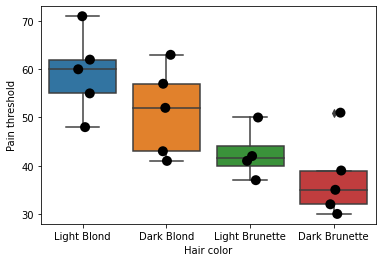

In [26]:
sns.boxplot(x='Hair color', y='Pain threshold', data=data)
sns.stripplot(x='Hair color', y='Pain threshold', data=data, color='black', size=10);

In [27]:
X=[
    data[data['Hair color'] == 'Dark Blond']['Pain threshold'],
    data[data['Hair color'] == 'Dark Brunette']['Pain threshold'],
    data[data['Hair color'] == 'Light Blond']['Pain threshold'],
    data[data['Hair color'] == 'Light Brunette']['Pain threshold'],
]

stats.kruskal(*X)

KruskalResult(statistic=10.588630377524138, pvalue=0.014171563303136903)

In [28]:
# Post hoc pairwise test for multiple comparisons of mean rank sums (Dunn's test)
# May be used after Kruskal-Wallis one-way ANOVA by ranks to do pairwise comparisons
import scikit_posthocs as sp

print(sp.posthoc_dunn(X, p_adjust='bonferroni'))

          1         2         3         4
1  1.000000  0.182573  1.000000  1.000000
2  0.182573  1.000000  0.017315  1.000000
3  1.000000  0.017315  1.000000  0.228586
4  1.000000  1.000000  0.228586  1.000000


In [29]:
# with pingouin
pg.kruskal(
    data=data,
    dv='Pain threshold',
    between='Hair color'
)

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172


In [30]:
# Non-parametric pairwise paired tests
pg.pairwise_ttests(
    data=data,
    dv='Pain threshold',
    between='Hair color',
    padjust='bonf',
    parametric=False, # use pg.wilcoxon or pg.mwu for paired and unpaired samples respectively
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Hair color,Dark Blond,Dark Brunette,False,False,23.0,two-sided,0.031746,0.190476,bonf,1.413596
1,Hair color,Dark Blond,Light Blond,False,False,7.0,two-sided,0.309524,1.000000,bonf,-0.810661
2,Hair color,Dark Blond,Light Brunette,False,False,16.5,two-sided,0.139983,0.839895,bonf,0.982361
3,Hair color,Dark Brunette,Light Blond,False,False,1.0,two-sided,0.015873,0.095238,bonf,-2.336811
4,Hair color,Dark Brunette,Light Brunette,False,False,5.0,two-sided,0.285714,1.000000,bonf,-0.626769
5,Hair color,Light Blond,Light Brunette,False,False,19.0,two-sided,0.031746,0.190476,bonf,2.015280


### Friedman's test

The Friedman test is equivalent to the test of significance of Kendalls's coefficient of concordance (Kendall's W). Most commonly a Q statistic, which has asymptotical chi-squared distribution, is computed and used for testing. However, some statisticians showed the _chi-squared test to be overly conservative for small numbers of samples and repeated measures_. Instead they _recommend the F test_, which has the correct size and behaves like a permutation test, but is computationaly much easier.

In [31]:
data_rm = pg.read_dataset('rm_anova')
data_rm.head()

,Subject,Gender,Region,Education,DesireToKill,Disgustingness,Frighteningness
0,1,Female,North,some,10.0,High,High
1,1,Female,North,some,9.0,High,Low
2,1,Female,North,some,6.0,Low,High
3,1,Female,North,some,6.0,Low,Low
4,2,Female,North,advance,10.0,High,High


In [32]:
pg.friedman(
    data=data_rm,
    dv='DesireToKill',
    within='Disgustingness',
    subject='Subject',
)

,Source,W,ddof1,Q,p-unc
Friedman,Disgustingness,0.099224,1,9.227848,0.002384


In [33]:
pg.friedman(
    data=data_rm,
    dv='DesireToKill',
    within='Disgustingness',
    subject='Subject',
    method='f',
)

,Source,W,ddof1,ddof2,F,p-unc
Friedman,Disgustingness,0.099224,0.978495,90.021505,10.13418,0.002138
